# **Weather Prediction using Historical Data**

>Utilize publicly available **Weather API** data (cloud cover, temperature, UV
index, wind speed, etc.).

>Follow the **CRISP-DM Framework** for structured project development.

>Implement both **Classification and Regression models.**

>Forecast temperature and humidity for up to the **next 3 hours.**

>Deploy the trained model to a **web-based application.**

## **Data Understanding**

### **Collect initial data**



*  **Fetch hourly historical weather data from https://www.weatherbit.io/**
*  **Sign up to create an account and obtain API Key.**




In [1]:
WEATHERBIT_API_KEY_1="9c346246aca94adf88d6f20cbeeeec26"
WEATHERBIT_API_KEY_2="69efd501efef46c4963c794e39d7f057"



*   **Configure the query string to include necessary parameters**



In [2]:
query_string = {"city": "Hanoi", "start_date": "2024-01-01", "end_date": "2025-01-01", "tz": "local", "key": WEATHERBIT_API_KEY_1}



*   **Base API URL**




In [3]:
url = "https://api.weatherbit.io/v2.0/history/hourly?"



*   **Fetch data from the Weatherbit API using the HTTP GET method by including the required query parameters**




In [4]:
import requests

response = requests.get(url, query_string).json()

print(response)

Output hidden; open in https://colab.research.google.com to view.

In [5]:
# with open("hanoi-weather-historical.txt", "r") as file:
#     response = file.read()

# response = json.loads(response)



*  **Save the raw API response data into a JSON file for further processing and analysis.**



In [6]:
import json

save_file = open("weather_historical_data.json", "w")
json.dump(response["data"], save_file, indent=5, ensure_ascii=False)
save_file.close()

*   **Transform JSON Response into pandas DataFrame**

In [7]:
import pandas as pd
from pandas import json_normalize

raw_df = json_normalize(response["data"])

raw_df

app_temp  azimuth  clouds       datetime  dewpt  dhi  dni  elev_angle  \
0         20.9    181.5      66  2023-12-31:17   18.1    0    0       -87.9   
1         21.4    101.2      87  2023-12-31:18   18.6    0    0       -76.0   
2         21.3     99.8      87  2023-12-31:19   18.3    0    0       -62.2   
3         21.2    101.5      87  2023-12-31:20   18.2    0    0       -48.5   
4         21.0    104.1      87  2023-12-31:21   18.1    0    0       -34.8   
...        ...      ...     ...            ...    ...  ...  ...         ...   
8779      16.8    252.5      37  2024-12-31:12   13.7    0    0       -21.2   
8780      16.0    255.9      37  2024-12-31:13   13.7    0    0       -34.7   
8781      15.2    258.5      37  2024-12-31:14   13.6    0    0       -48.3   
8782      14.4    260.1      37  2024-12-31:15   13.4    0    0       -62.1   
8783      14.0    258.8      37  2024-12-31:16   13.1    0    0       -75.9   

      ghi h_angle  ...        timestamp_utc          ts   uv vis  wind_dir  \
0       0    None  ...  2023-12-31T17:00:00  1704042000  0.0  10       145   
1       0    None  ...  2023-12-31T18:00:00  1704045600  0.0  10       140   
2       0    None  ...  2023-12-31T19:00:00  1704049200  0.0  10       140   
3       0    None  ...  2023-12-31T20:00:00  1704052800  0.0  10       140   
4       0    None  ...  2023-12-31T21:00:00  1704056400  0.0  10       140   
...   ...     ...  ...                  ...         ...  ...  ..       ...   
8779    0    None  ...  2024-12-31T12:00:00  1735646400  0.0  10       360   
8780    0    None  ...  2024-12-31T13:00:00  1735650000  0.0   8       360   
8781    0    None  ...  2024-12-31T14:00:00  1735653600  0.0   6       360   
8782    0    None  ...  2024-12-31T15:00:00  1735657200  0.0   4       360   
8783    0    None  ...  2024-12-31T16:00:00  1735660800  0.0   4       360   

      wind_gust_spd  wind_spd  weather.icon  weather.description weather.code  
0               2.0      0.66          c03n        Broken clouds          803  
1               2.4      1.00          c04n      Overcast clouds          804  
2               2.0      0.66          c04n      Overcast clouds          804  
3               2.4      0.33          c04n      Overcast clouds          804  
4               2.0      0.80          c04n      Overcast clouds          804  
...             ...       ...           ...                  ...          ...  
8779            4.0      2.00          c02n     Scattered clouds          802  
8780            4.0      2.00          c02n     Scattered clouds          802  
8781            4.0      2.00          c02n     Scattered clouds          802  
8782            3.2      1.60          c02n     Scattered clouds          802  
8783            2.8      2.00          c02n     Scattered clouds          802  

[8784 rows x 30 columns]

### **Describe the data**

**Feature Description**

| Feature              | Description                                                                                  |
|--------------------|----------------------------------------------------------------------------------------------|
| `datetime`         | Date in UTC (format: `YYYY-MM-DD:HH`). **[Deprecated]**                                      |
| `ts`               | Timestamp (Unix time).                                                                       |
| `timestamp_local`  | Local time timestamp.                                                                        |
| `timestamp_utc`    | UTC time timestamp.                                                                          |
| `revision_status`  | Data revision status - either `interim` (subject to revision) or `final`.                    |
| `pres`             | Pressure (in millibars).                                                                     |
| `slp`              | Sea level pressure (in millibars).                                                           |
| `wind_spd`         | Wind speed (default unit: meters/second).                                                   |
| `wind_gust_spd`    | Wind gust speed (default unit: meters/second).                                              |
| `wind_dir`         | Wind direction (in degrees).                                                                 |
| `temp`             | Temperature (default unit: Celsius).                                                         |
| `app_temp`         | Apparent or "Feels Like" temperature (default unit: Celsius).                               |
| `rh`               | Relative humidity (percentage).                                                              |
| `dewpt`            | Dew point temperature (default unit: Celsius).                                              |
| `clouds`           | Satellite-based cloud coverage (percentage).                                                |
| `pod`              | Part of day: `d` = day, `n` = night.                                                         |
| `weather`          | Object containing weather information:                                                       |
|                    | - `icon`: Weather icon code                                                                  |
|                    | - `code`: Weather condition code                                                             |
|                    | - `description`: Textual description of the weather                                         |
| `vis`              | Visibility (default unit: kilometers).                                                       |
| `precip`           | Accumulated liquid equivalent precipitation (default unit: millimeters).                    |
| `snow`             | Accumulated snowfall (default unit: millimeters).                                           |
| `dhi`              | Diffuse horizontal solar irradiance (W/m²) under clear sky conditions.                      |
| `dni`              | Direct normal solar irradiance (W/m²) under clear sky conditions.                           |
| `ghi`              | Global horizontal solar irradiance (W/m²) under clear sky conditions.                       |
| `solar_rad`        | Estimated solar radiation (W/m²).                                                            |
| `uv`               | UV Index (scale from 0 to 11+).                                                              |
| `elev_angle`       | Solar elevation angle (in degrees).                                                          |
| `azimuth`          | Solar azimuth angle (in degrees).                                                            |
| `h_angle`          | **[Deprecated]** Solar hour angle (in degrees).                                              |




*   **Explore data information**




In [8]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   app_temp             8784 non-null   float64
 1   azimuth              8784 non-null   float64
 2   clouds               8784 non-null   int64  
 3   datetime             8784 non-null   object 
 4   dewpt                8784 non-null   float64
 5   dhi                  8784 non-null   int64  
 6   dni                  8784 non-null   int64  
 7   elev_angle           8784 non-null   float64
 8   ghi                  8784 non-null   int64  
 9   h_angle              0 non-null      object 
 10  pod                  8784 non-null   object 
 11  precip               8784 non-null   float64
 12  pres                 8784 non-null   int64  
 13  revision_status      8784 non-null   object 
 14  rh                   8784 non-null   int64  
 15  slp                  8784 non-null   i



*   **Check Number of Records and Features**



In [9]:
print("Number of rows and cols:", raw_df.shape)

print("All columns features:", raw_df.columns.to_list())

Number of rows and cols: (8784, 30)
All columns features: ['app_temp', 'azimuth', 'clouds', 'datetime', 'dewpt', 'dhi', 'dni', 'elev_angle', 'ghi', 'h_angle', 'pod', 'precip', 'pres', 'revision_status', 'rh', 'slp', 'snow', 'solar_rad', 'temp', 'timestamp_local', 'timestamp_utc', 'ts', 'uv', 'vis', 'wind_dir', 'wind_gust_spd', 'wind_spd', 'weather.icon', 'weather.description', 'weather.code']


*   **Summary Statistics of the Dataset**

In [10]:
raw_df.describe()

app_temp      azimuth       clouds        dewpt          dhi  \
count  8784.000000  8784.000000  8784.000000  8784.000000  8784.000000   
mean     28.591553   179.757605    70.595856    21.244103    47.455829   
std       8.669653    97.815444    30.649312     5.680982    51.814096   
min       9.000000     0.000000     0.000000     2.300000     0.000000   
25%      22.300000    89.300000    54.000000    18.000000     0.000000   
50%      27.300000   180.000000    79.000000    23.300000    13.000000   
75%      35.400000   270.500000   100.000000    25.600000   107.000000   
max      51.000000   360.000000   100.000000    29.600000   128.000000   

               dni   elev_angle          ghi       precip         pres  ...  \
count  8784.000000  8784.000000  8784.000000  8784.000000  8784.000000  ...   
mean    378.430214     0.178871   289.627163     0.279229  1009.668830  ...   
std     406.871905    44.500126   367.950754     1.116591     7.273903  ...   
min       0.000000   -88.600000     0.000000     0.000000   983.000000  ...   
25%       0.000000   -37.900000     0.000000     0.000000  1004.000000  ...   
50%      64.000000     1.100000     7.000000     0.000000  1009.000000  ...   
75%     857.000000    37.900000   627.250000     0.000000  1015.000000  ...   
max     956.000000    89.300000  1062.000000    24.250000  1030.000000  ...   

         snow    solar_rad         temp            ts           uv  \
count  8784.0  8784.000000  8784.000000  8.784000e+03  8784.000000   
mean      0.0   157.858379    25.366314  1.719851e+09     1.310178   
std       0.0   234.891537     5.518091  9.129120e+06     1.908477   
min       0.0     0.000000     9.000000  1.704042e+09     0.000000   
25%       0.0     0.000000    21.875000  1.711947e+09     0.000000   
50%       0.0    15.500000    26.300000  1.719851e+09     0.600000   
75%       0.0   218.000000    29.200000  1.727756e+09     2.000000   
max       0.0   988.000000    39.500000  1.735661e+09    12.000000   

               vis     wind_dir  wind_gust_spd     wind_spd  weather.code  
count  8784.000000  8784.000000    8784.000000  8784.000000   8784.000000  
mean      9.963342   180.925319       4.539788     1.644252    769.191712  
std       2.459514    86.675326       2.159461     0.890354    105.623387  
min       0.000000     0.000000       0.400000     0.000000    200.000000  
25%      10.000000   140.000000       2.800000     1.000000    802.000000  
50%      10.000000   155.000000       4.400000     1.600000    804.000000  
75%      10.000000   230.000000       6.000000     2.000000    804.000000  
max      16.000000   360.000000      25.600000    14.900000    804.000000  

[8 rows x 22 columns]



*   **Categorical variables**




In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

categorical = raw_df.select_dtypes(include = ["object"]).keys()
print("Number of categorical variables:", len(categorical))
print(categorical)

Number of categorical variables: 8
Index(['datetime', 'h_angle', 'pod', 'revision_status', 'timestamp_local',
       'timestamp_utc', 'weather.icon', 'weather.description'],
      dtype='object')


*   **Numeric variables**

In [12]:
numeric = raw_df.select_dtypes(include = ["int64","float64"]).keys()
print("Number of numeric variables:", len(numeric))
print(numeric)

Number of numeric variables: 22
Index(['app_temp', 'azimuth', 'clouds', 'dewpt', 'dhi', 'dni', 'elev_angle',
       'ghi', 'precip', 'pres', 'rh', 'slp', 'snow', 'solar_rad', 'temp', 'ts',
       'uv', 'vis', 'wind_dir', 'wind_gust_spd', 'wind_spd', 'weather.code'],
      dtype='object')




*   **Types of Weather in data**




In [13]:
raw_df["weather.description"].unique()

array(['Broken clouds', 'Overcast clouds', 'Scattered clouds', 'Drizzle',
       'Fog', 'Few clouds', 'Haze', 'Clear Sky', 'Light rain',
       'Moderate rain', 'Heavy rain', 'Thunderstorm with rain',
       'Thunderstorm with light rain'], dtype=object)



*   **Temperature Range in the data**



In [14]:
raw_df["temp"].unique()

array([20.5, 21. , 20.9, 20.8, 20.7, 19. , 20.2, 21.5, 22.7, 24. , 25. ,
       26. , 27. , 26.8, 26.7, 26.5, 25.2, 23.8, 22.5, 22.2, 22. , 21.7,
       21.6, 21.3, 21.2, 21.1, 23.2, 24.3, 25.4, 26.6, 25.7, 24.5, 23.4,
       23. , 22.6, 21.8, 20.4, 19.5, 18.7, 18.5, 18.4, 18.2, 18. , 17.7,
       17.5, 19.2, 20.1, 19.6, 18.6, 18.3, 18.8, 19.4, 20. , 20.6, 19.9,
       19.3, 19.1, 22.3, 23.1, 23.7, 24.4, 21.4, 20.3, 19.8, 19.7, 24.7,
       24.9, 23.9, 21.9, 24.2, 25.3, 25.5, 22.8, 23.5, 25.8, 26.2, 22.1,
       18.9, 18.1, 17.8, 17.6, 17.9, 22.9, 23.3, 26.4, 24.6, 24.1, 27.1,
       24.8, 23.6, 25.6, 17.4, 17.3, 17.2, 16.8, 16.4, 16. , 16.1, 16.3,
       16.2, 15.9, 15.7, 15.6, 15.4, 15.3, 15.1, 15. , 14.7, 14.5, 14.2,
       14. , 13.8, 13.6, 13.2, 12.7, 12.3, 12.2, 12.1, 12. , 11.8, 11.7,
       11.5, 11.2, 11. , 10.8, 10.6, 10.4, 10.3, 10.1, 10. ,  9.9,  9.8,
        9.7, 11.9, 12.4, 12.6, 10.7, 10.5, 10.2,  9.5,  9.4,  9.3,  9.2,
        9.1,  9. , 10.9, 11.4, 11.6, 11.3, 12.5, 13



*   **UV Index Range in data**


In [15]:
raw_df["uv"].unique()

array([ 0. ,  1.2,  1.4,  1.7,  3.1,  4.2,  4.6,  4.7,  3.8,  1.9,  0.9,
        1.5,  0.8,  1.8,  1.6,  4.1,  4.3,  1.3,  0.6,  0.7,  1. ,  2. ,
        2.1,  2.3,  2.8,  1.1,  2.5,  3.5,  3.2,  2.6,  2.2,  2.4,  3. ,
        3.7,  3.9,  3.3,  3.6,  2.7,  3.4,  2.9,  4.4,  4.5,  6.9,  5.3,
        5.7,  4.8,  5.6,  7.3,  8.2,  7.6,  6.2,  7.1,  6. ,  6.3,  7.7,
        5.9,  7. ,  8.1,  7.2,  5. ,  7.4,  9.6,  9.1,  5.1,  5.2,  8.7,
        9.7,  9.2,  6.8,  8.6,  9.4,  9. ,  5.5,  6.6,  8.3,  9.5,  5.4,
        4. ,  6.1,  4.9,  8. ,  8.8, 10.1,  8.4, 10.5, 11.4, 10.6, 11.3,
       10.3,  7.8,  6.4, 10.7, 11. ,  7.5,  5.8, 10. ,  7.9, 11.9,  8.5,
        6.5, 12. , 11.1,  9.3, 11.8,  8.9, 10.4, 11.2, 10.2,  6.7,  9.9,
        9.8, 10.8, 10.9])

### **Exploratory Data Analysis (EDA)**



*   **Frequency Distribution of Categorical Variables**




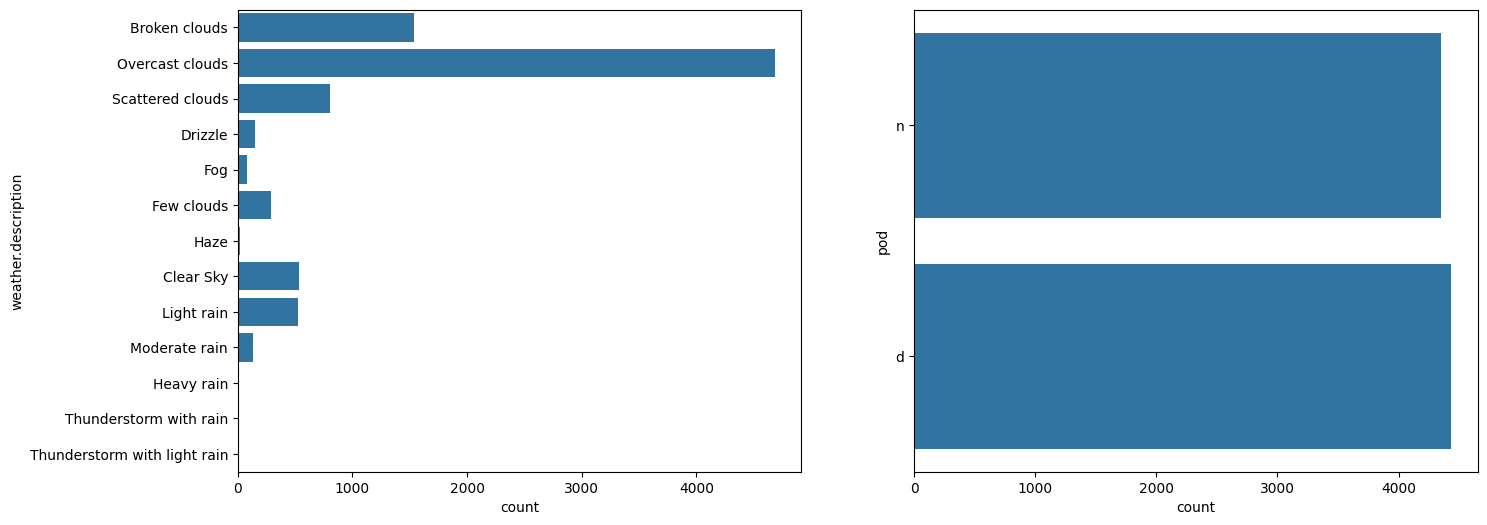

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(data=raw_df, y="weather.description", ax=axes[0])
sns.countplot(data=raw_df, y="pod",ax=axes[1])
plt.show()



*   **Frequency Distribution of Numeric Variables**



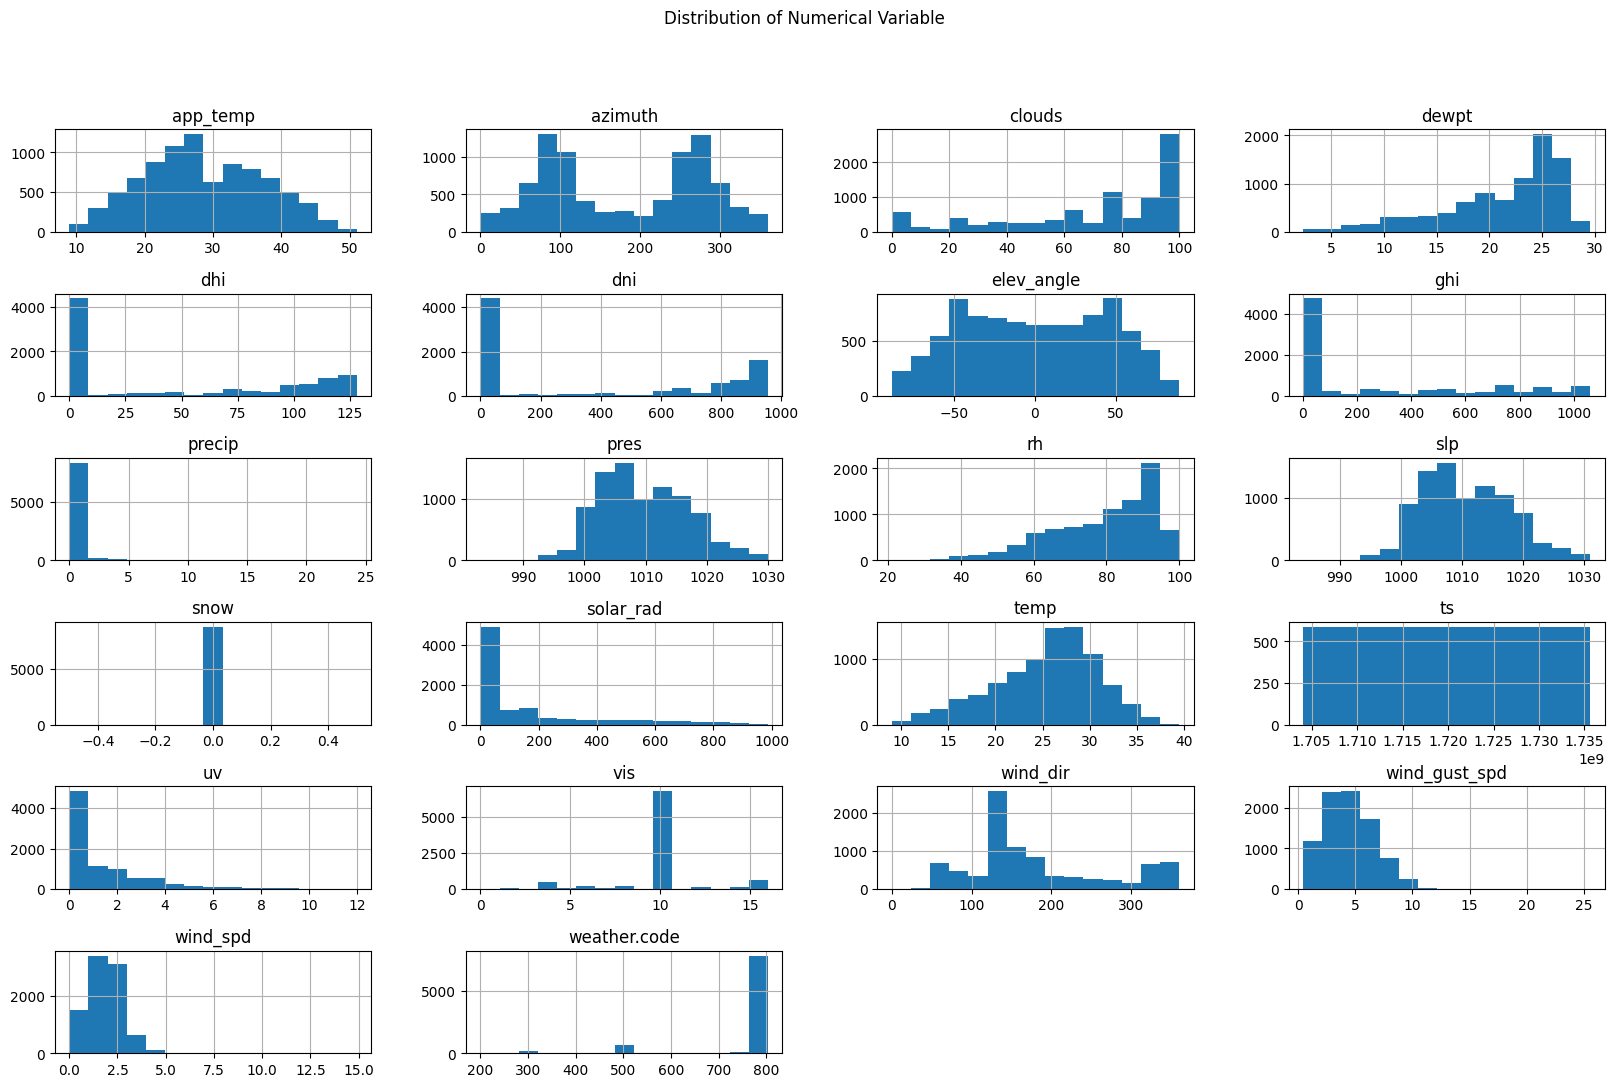

In [17]:
raw_df[numeric].hist(bins=15, figsize=(20, 12), layout=(6, 4))
plt.subplots_adjust(hspace=0.6)
plt.suptitle("Distribution of Numerical Variable")
plt.show()



*   **Pie chart of weather condition distribution**




In [18]:
import plotly.express as px

weather_counts = raw_df['weather.description'].value_counts().reset_index()
weather_counts.columns = ['Weather Condition', 'Count']

fig = px.pie(weather_counts,
             names='Weather Condition',
             values='Count',
             color_discrete_sequence=px.colors.qualitative.Set3
)

fig.show()



*   **Most common weather conditions**




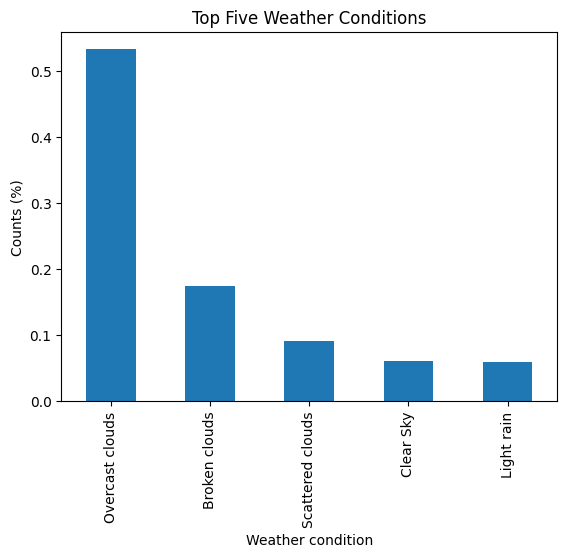

In [19]:
ax = (raw_df['weather.description'].value_counts(normalize = True)).head(5).plot(kind = 'bar', title = 'Top Five Weather Conditions' )
ax.set_xlabel("Weather condition")
ax.set_ylabel('Counts (%)')

plt.show()



*   **Distribution of Temperature, Relative Humidity, Wind Speed and UV Index**




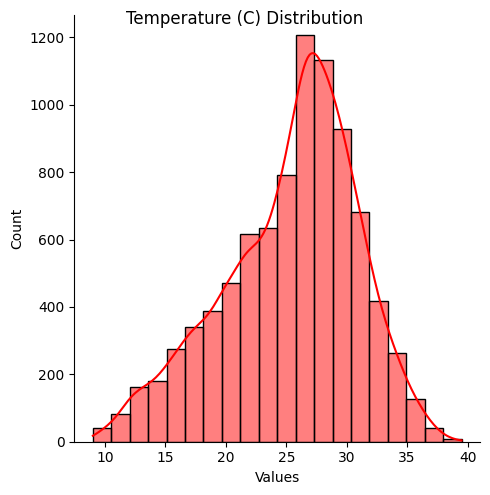

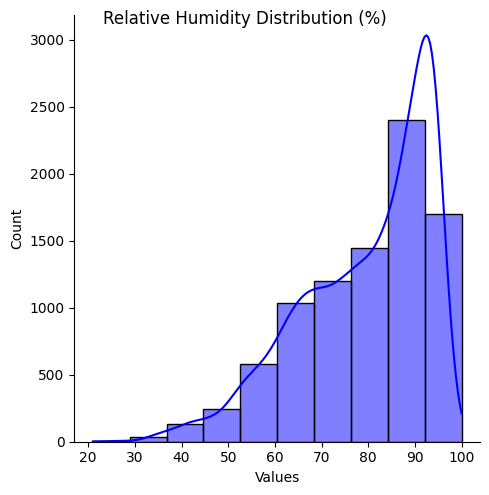

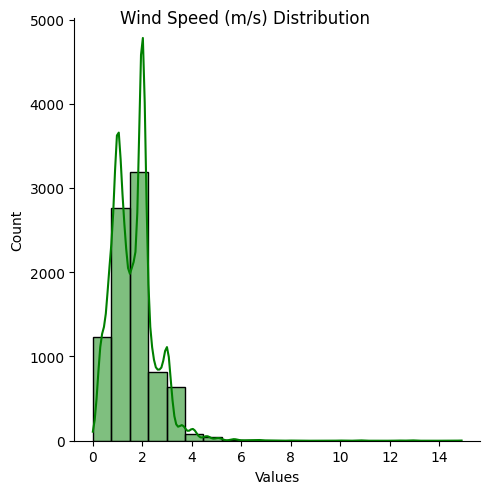

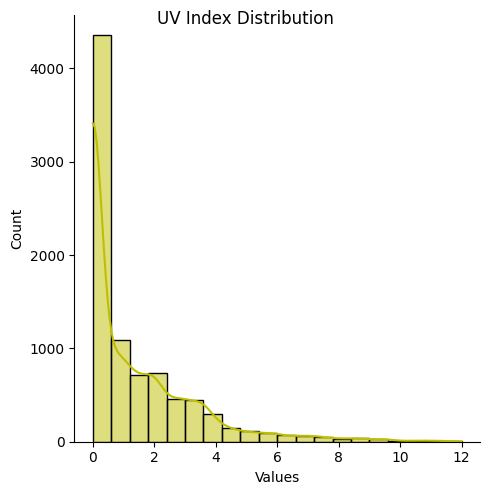

In [20]:
g = sns.displot(data=raw_df, x="temp", kde=True, color='r', bins=20, stat="count")
g.fig.suptitle('Temperature (C) Distribution')
plt.xlabel('Values')
plt.ylabel('Count')
plt.show()


g = sns.displot(data=raw_df, x="rh", kde=True, color='b', bins=10, stat="count")
g.fig.suptitle('Relative Humidity Distribution (%)')
plt.xlabel('Values')
plt.ylabel('Count')
plt.show()


g = sns.displot(data=raw_df, x="wind_spd", kde=True, color='g', bins=20, stat="count")
g.fig.suptitle('Wind Speed (m/s) Distribution')
plt.xlabel('Values')
plt.ylabel('Count')
plt.show()

g = sns.displot(data=raw_df, x="uv", kde=True, color='y', bins=20, stat="count")
g.fig.suptitle('UV Index Distribution')
plt.xlabel('Values')
plt.ylabel('Count')
plt.show()



*   **Pairplot showing relationships between Temperature, Apparent Temperature, Humidity, and Wind Speed**



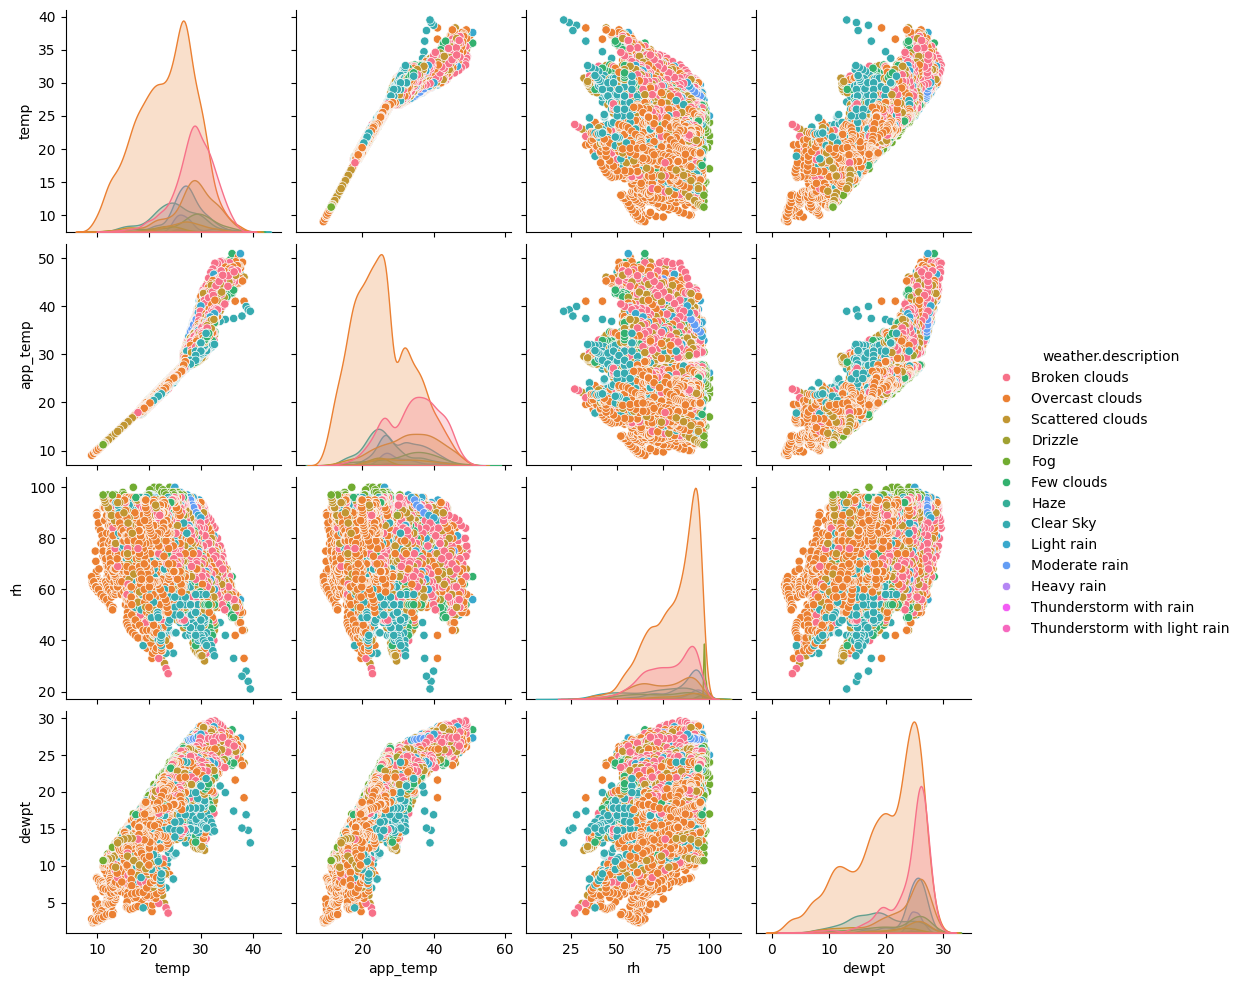

In [21]:
sns.pairplot(raw_df, vars=['temp', 'app_temp', 'rh', 'dewpt'], hue='weather.description')
plt.show()



*   **Count Frequency of Each Weather Condition**


In [22]:
weather_cond_counts = raw_df["weather.description"].value_counts()
weather_cond_counts

weather.description
Overcast clouds                 4681
Broken clouds                   1533
Scattered clouds                 804
Clear Sky                        535
Light rain                       524
Few clouds                       288
Drizzle                          150
Moderate rain                    135
Fog                               77
Haze                              23
Thunderstorm with rain            14
Heavy rain                        11
Thunderstorm with light rain       9
Name: count, dtype: int64



*   **Summary of Temperature, Apparent Temperature and Humidity by Weather Condition**



In [23]:
grouped_data = raw_df.groupby(by = 'weather.description')[['temp', 'app_temp','rh']].agg(['max','min', 'mean']).sort_values(by = 'weather.description', axis =0, ascending=False )

grouped_data

temp                  app_temp                   \
                               max   min       mean      max   min       mean   
weather.description                                                             
Thunderstorm with rain        30.5  24.7  26.235714     39.3  25.7  28.021429   
Thunderstorm with light rain  27.9  24.1  26.244444     32.8  25.0  28.400000   
Scattered clouds              38.3  11.3  28.266667     49.2  11.3  33.233582   
Overcast clouds               38.3   9.0  23.374963     50.3   9.0  25.555779   
Moderate rain                 34.5  24.2  27.207407     45.7  25.2  30.609630   
Light rain                    37.6  18.0  27.387595     51.0  18.0  31.652672   
Heavy rain                    30.1  23.9  27.072727     38.7  24.8  31.181818   
Haze                          29.0  18.4  23.208696     36.1  18.8  25.347826   
Fog                           26.7  11.2  21.981818     30.5  11.2  22.851948   
Few clouds                    37.4  12.0  28.067361     51.0  12.0  32.713194   
Drizzle                       35.4  18.0  27.309333     46.8  18.0  31.555333   
Clear Sky                     39.5  13.0  24.934393     47.2  13.0  26.334579   
Broken clouds                 38.0  12.6  28.702935     49.4  12.6  34.250685   

                               rh                 
                              max min       mean  
weather.description                               
Thunderstorm with rain         98  80  92.500000  
Thunderstorm with light rain   95  87  91.666667  
Scattered clouds               96  31  74.652985  
Overcast clouds                96  33  80.629780  
Moderate rain                  98  54  88.807407  
Light rain                    100  39  85.377863  
Heavy rain                     94  78  90.363636  
Haze                           96  82  93.739130  
Fog                           100  97  97.493506  
Few clouds                     96  38  73.090278  
Drizzle                        98  44  82.980000  
Clear Sky                      96  21  69.650467  
Broken clouds                  96  27  77.811481



*   **Boxplot of Relative Humidity Across Different Weather Conditions**



<ipython-input-24-dd1d13d20409>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




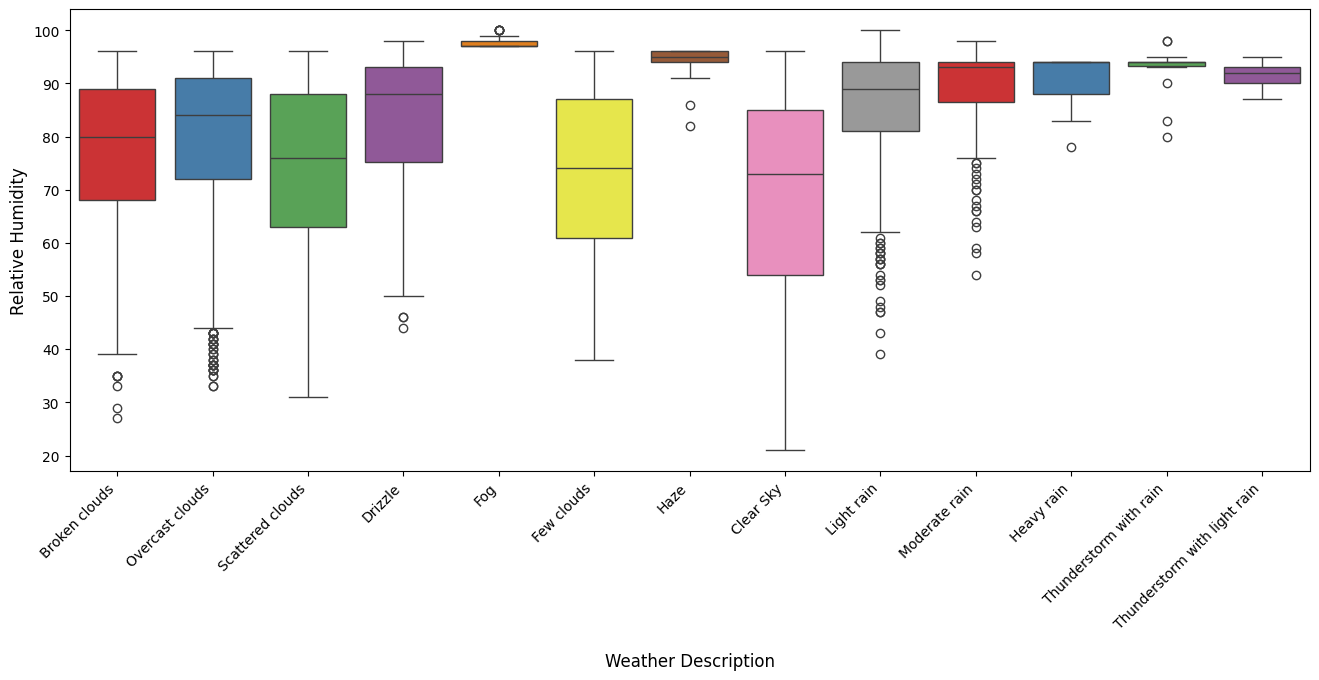

In [24]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=raw_df, x='weather.description', y='rh', palette='Set1')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Weather Description', fontsize=12, labelpad=15)
plt.ylabel('Relative Humidity', fontsize=12)
plt.show()



*   **Daily Temperature Record**



In [25]:
fig = px.line(raw_df, x='timestamp_local', y="temp",
              labels={'value': 'Temperature (°C)', 'date': 'Date'},
              title='Daily Temperature (01-2024 - 01-2025)')

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Temperature (°C)',
    template='plotly_white'
)

fig.show()

## **Data Preparation**



*   **Check for any NaN values in columns**



In [26]:
df = raw_df.copy()

raw_df.isnull().sum()

app_temp                  0
azimuth                   0
clouds                    0
datetime                  0
dewpt                     0
dhi                       0
dni                       0
elev_angle                0
ghi                       0
h_angle                8784
pod                       0
precip                    0
pres                      0
revision_status           0
rh                        0
slp                       0
snow                      0
solar_rad                 0
temp                      0
timestamp_local           0
timestamp_utc             0
ts                        0
uv                        0
vis                       0
wind_dir                  0
wind_gust_spd             0
wind_spd                  0
weather.icon              0
weather.description       0
weather.code              0
dtype: int64

In [27]:
df = df.drop("h_angle", axis=1)

df.head()

app_temp  azimuth  clouds       datetime  dewpt  dhi  dni  elev_angle  ghi  \
0      20.9    181.5      66  2023-12-31:17   18.1    0    0       -87.9    0   
1      21.4    101.2      87  2023-12-31:18   18.6    0    0       -76.0    0   
2      21.3     99.8      87  2023-12-31:19   18.3    0    0       -62.2    0   
3      21.2    101.5      87  2023-12-31:20   18.2    0    0       -48.5    0   
4      21.0    104.1      87  2023-12-31:21   18.1    0    0       -34.8    0   

  pod  ...        timestamp_utc          ts   uv  vis  wind_dir  \
0   n  ...  2023-12-31T17:00:00  1704042000  0.0   10       145   
1   n  ...  2023-12-31T18:00:00  1704045600  0.0   10       140   
2   n  ...  2023-12-31T19:00:00  1704049200  0.0   10       140   
3   n  ...  2023-12-31T20:00:00  1704052800  0.0   10       140   
4   n  ...  2023-12-31T21:00:00  1704056400  0.0   10       140   

   wind_gust_spd  wind_spd  weather.icon weather.description weather.code  
0            2.0      0.66          c03n       Broken clouds          803  
1            2.4      1.00          c04n     Overcast clouds          804  
2            2.0      0.66          c04n     Overcast clouds          804  
3            2.4      0.33          c04n     Overcast clouds          804  
4            2.0      0.80          c04n     Overcast clouds          804  

[5 rows x 29 columns]

*   **Feature selection through Removal of redundant features**




In [28]:
redundant_features = []

>The **weather.description** column already provides a clear representation of the weather conditions; therefore, the **weather.code** and **weather.icon** columns are redundant and can be removed.

In [29]:
print(df["weather.description"].unique())

df = df.rename(columns={"weather.description": "summary"})

['Broken clouds' 'Overcast clouds' 'Scattered clouds' 'Drizzle' 'Fog'
 'Few clouds' 'Haze' 'Clear Sky' 'Light rain' 'Moderate rain' 'Heavy rain'
 'Thunderstorm with rain' 'Thunderstorm with light rain']


In [30]:
print(df["weather.code"].unique())

redundant_features.append("weather.code")

[803 804 802 301 741 801 721 800 500 501 502 201 200]


In [31]:
print(df["weather.icon"].unique())

redundant_features.append("weather.icon")

['c03n' 'c04n' 'c03d' 'c02d' 'c04d' 'c02n' 'd02n' 'a05n' 'a03n' 'a03d'
 'c01d' 'a05d' 'c01n' 'r01n' 'r01d' 'd02d' 'r02n' 'r02d' 'r03n' 'r03d'
 't02n' 't01n' 't01d' 't02d']


> All values in the **snow** column are zero, it does not contribute any meaningful information.

In [32]:
print(df["snow"].unique())

redundant_features.append("snow")

[0]


> The **azimuth** angle represents the sun's horizontal direction, which may not have a significant impact on temperature

In [33]:
print(df['azimuth'].unique())

redundant_features.append("azimuth")

[181.5 101.2  99.8 ... 180.2 199.3 178.5]


> The datetime column such as **timestamp_local**, **ts**, **datetime** and **timestamp_utc** are unnecessary.

In [34]:
print(df["timestamp_local"].unique())

redundant_features.append("ts")
redundant_features.append("timestamp_utc")
redundant_features.append("datetime")

['2024-01-01T00:00:00' '2024-01-01T01:00:00' '2024-01-01T02:00:00' ...
 '2024-12-31T21:00:00' '2024-12-31T22:00:00' '2024-12-31T23:00:00']


> The **revision_status** column only indicates the data's revision stage and does not contribute to the prediction task.

In [35]:
print(df["revision_status"].unique())

redundant_features.append("revision_status")

['final']


> All redundant features to be dropped.

In [36]:
print(redundant_features)

df = df.drop(redundant_features, axis=1)

df.head()

['weather.code', 'weather.icon', 'snow', 'azimuth', 'ts', 'timestamp_utc', 'datetime', 'revision_status']


app_temp  clouds  dewpt  dhi  dni  elev_angle  ghi pod  precip  pres  ...  \
0      20.9      66   18.1    0    0       -87.9    0   n     0.0  1016  ...   
1      21.4      87   18.6    0    0       -76.0    0   n     0.0  1016  ...   
2      21.3      87   18.3    0    0       -62.2    0   n     0.0  1016  ...   
3      21.2      87   18.2    0    0       -48.5    0   n     0.0  1015  ...   
4      21.0      87   18.1    0    0       -34.8    0   n     0.0  1015  ...   

    slp  solar_rad  temp      timestamp_local   uv  vis  wind_dir  \
0  1017          0  20.5  2024-01-01T00:00:00  0.0   10       145   
1  1017          0  21.0  2024-01-01T01:00:00  0.0   10       140   
2  1017          0  20.9  2024-01-01T02:00:00  0.0   10       140   
3  1016          0  20.8  2024-01-01T03:00:00  0.0   10       140   
4  1016          0  20.7  2024-01-01T04:00:00  0.0   10       140   

   wind_gust_spd  wind_spd          summary  
0            2.0      0.66    Broken clouds  
1            2.4      1.00  Overcast clouds  
2            2.0      0.66  Overcast clouds  
3            2.4      0.33  Overcast clouds  
4            2.0      0.80  Overcast clouds  

[5 rows x 21 columns]



*   **Feature selection using correlation matrix**




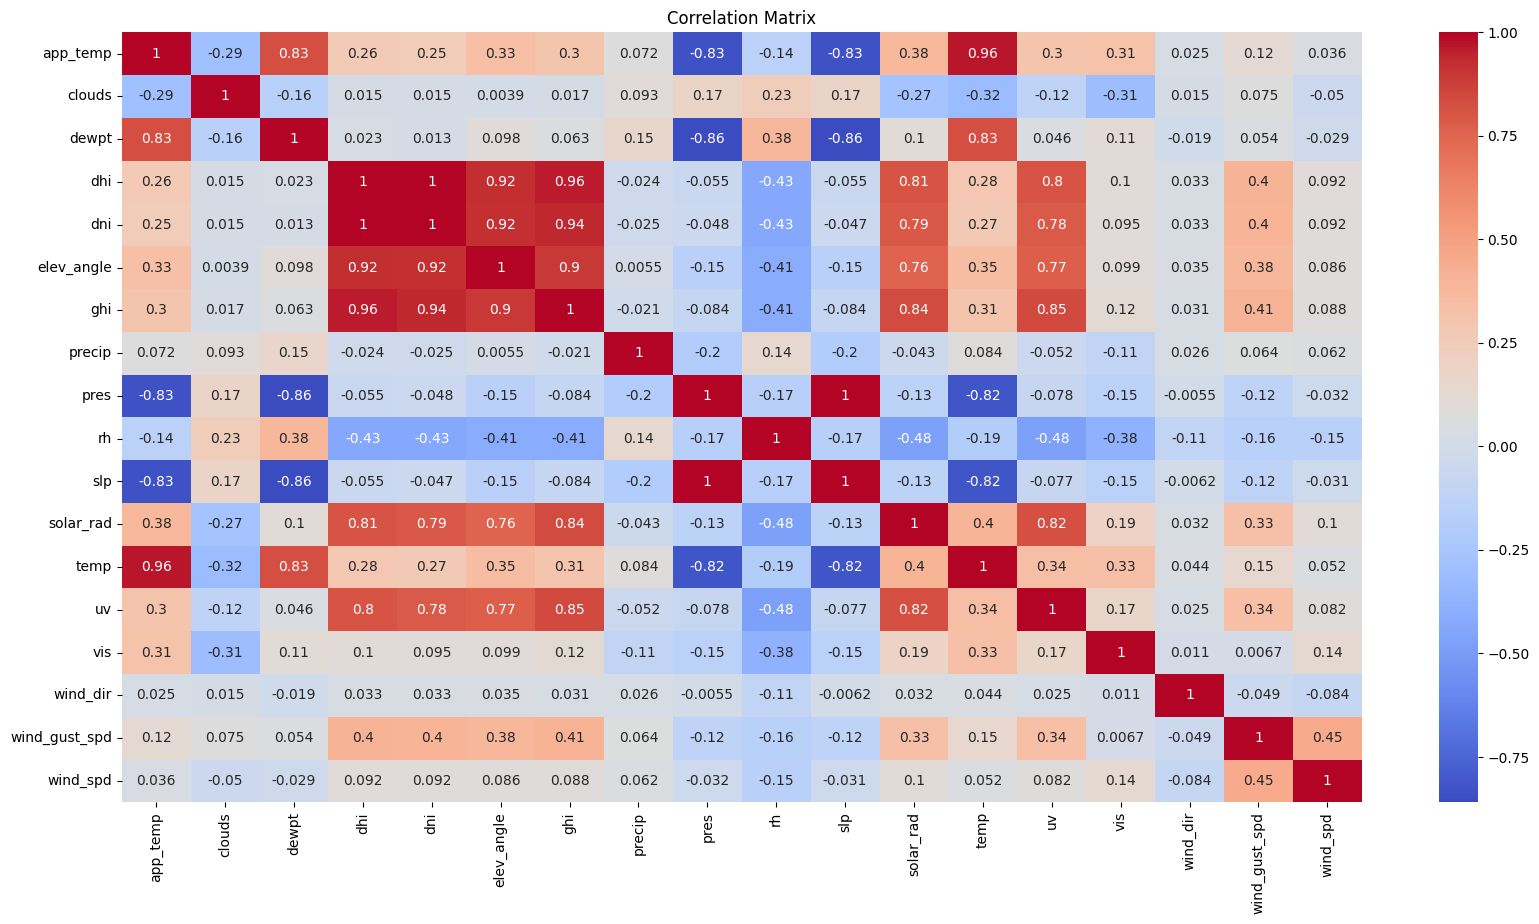

In [37]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

> Select columns with a **threshold > 0.8** for removal

In [38]:
to_drop = ["app_temp", "dhi", "dni", "elev_angle", "ghi", "solar_rad"]

df = df.drop(to_drop, axis=1)

df

clouds  dewpt pod  precip  pres  rh   slp  temp      timestamp_local  \
0         66   18.1   n     0.0  1016  86  1017  20.5  2024-01-01T00:00:00   
1         87   18.6   n     0.0  1016  86  1017  21.0  2024-01-01T01:00:00   
2         87   18.3   n     0.0  1016  85  1017  20.9  2024-01-01T02:00:00   
3         87   18.2   n     0.0  1015  85  1016  20.8  2024-01-01T03:00:00   
4         87   18.1   n     0.0  1015  85  1016  20.7  2024-01-01T04:00:00   
...      ...    ...  ..     ...   ...  ..   ...   ...                  ...   
8779      37   13.7   n     0.0  1018  82  1019  16.8  2024-12-31T19:00:00   
8780      37   13.7   n     0.0  1018  86  1019  16.0  2024-12-31T20:00:00   
8781      37   13.6   n     0.0  1018  90  1019  15.2  2024-12-31T21:00:00   
8782      37   13.4   n     0.0  1019  94  1019  14.4  2024-12-31T22:00:00   
8783      37   13.1   n     0.0  1018  94  1019  14.0  2024-12-31T23:00:00   

       uv  vis  wind_dir  wind_gust_spd  wind_spd           summary  
0     0.0   10       145            2.0      0.66     Broken clouds  
1     0.0   10       140            2.4      1.00   Overcast clouds  
2     0.0   10       140            2.0      0.66   Overcast clouds  
3     0.0   10       140            2.4      0.33   Overcast clouds  
4     0.0   10       140            2.0      0.80   Overcast clouds  
...   ...  ...       ...            ...       ...               ...  
8779  0.0   10       360            4.0      2.00  Scattered clouds  
8780  0.0    8       360            4.0      2.00  Scattered clouds  
8781  0.0    6       360            4.0      2.00  Scattered clouds  
8782  0.0    4       360            3.2      1.60  Scattered clouds  
8783  0.0    4       360            2.8      2.00  Scattered clouds  

[8784 rows x 15 columns]



*   **Handle datetime feature**



In [39]:
df = df.rename(columns={"timestamp_local": "datetime"})

df['datetime'] = pd.to_datetime(df['datetime'])

df = df.set_index('datetime')

df

clouds  dewpt pod  precip  pres  rh   slp  temp   uv  \
datetime                                                                    
2024-01-01 00:00:00      66   18.1   n     0.0  1016  86  1017  20.5  0.0   
2024-01-01 01:00:00      87   18.6   n     0.0  1016  86  1017  21.0  0.0   
2024-01-01 02:00:00      87   18.3   n     0.0  1016  85  1017  20.9  0.0   
2024-01-01 03:00:00      87   18.2   n     0.0  1015  85  1016  20.8  0.0   
2024-01-01 04:00:00      87   18.1   n     0.0  1015  85  1016  20.7  0.0   
...                     ...    ...  ..     ...   ...  ..   ...   ...  ...   
2024-12-31 19:00:00      37   13.7   n     0.0  1018  82  1019  16.8  0.0   
2024-12-31 20:00:00      37   13.7   n     0.0  1018  86  1019  16.0  0.0   
2024-12-31 21:00:00      37   13.6   n     0.0  1018  90  1019  15.2  0.0   
2024-12-31 22:00:00      37   13.4   n     0.0  1019  94  1019  14.4  0.0   
2024-12-31 23:00:00      37   13.1   n     0.0  1018  94  1019  14.0  0.0   

                     vis  wind_dir  wind_gust_spd  wind_spd           summary  
datetime                                                                       
2024-01-01 00:00:00   10       145            2.0      0.66     Broken clouds  
2024-01-01 01:00:00   10       140            2.4      1.00   Overcast clouds  
2024-01-01 02:00:00   10       140            2.0      0.66   Overcast clouds  
2024-01-01 03:00:00   10       140            2.4      0.33   Overcast clouds  
2024-01-01 04:00:00   10       140            2.0      0.80   Overcast clouds  
...                  ...       ...            ...       ...               ...  
2024-12-31 19:00:00   10       360            4.0      2.00  Scattered clouds  
2024-12-31 20:00:00    8       360            4.0      2.00  Scattered clouds  
2024-12-31 21:00:00    6       360            4.0      2.00  Scattered clouds  
2024-12-31 22:00:00    4       360            3.2      1.60  Scattered clouds  
2024-12-31 23:00:00    4       360            2.8      2.00  Scattered clouds  

[8784 rows x 14 columns]



*   **Encoding Categorical Features Using Label Encoding**




In [40]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["pod"] = df["pod"].map({"d": 0, "n": 1})
df["summary"] = le.fit_transform(df["summary"])

df.head()

clouds  dewpt  pod  precip  pres  rh   slp  temp   uv  \
datetime                                                                     
2024-01-01 00:00:00      66   18.1    1     0.0  1016  86  1017  20.5  0.0   
2024-01-01 01:00:00      87   18.6    1     0.0  1016  86  1017  21.0  0.0   
2024-01-01 02:00:00      87   18.3    1     0.0  1016  85  1017  20.9  0.0   
2024-01-01 03:00:00      87   18.2    1     0.0  1015  85  1016  20.8  0.0   
2024-01-01 04:00:00      87   18.1    1     0.0  1015  85  1016  20.7  0.0   

                     vis  wind_dir  wind_gust_spd  wind_spd  summary  
datetime                                                              
2024-01-01 00:00:00   10       145            2.0      0.66        0  
2024-01-01 01:00:00   10       140            2.4      1.00        9  
2024-01-01 02:00:00   10       140            2.0      0.66        9  
2024-01-01 03:00:00   10       140            2.4      0.33        9  
2024-01-01 04:00:00   10       140            2.0      0.80        9

## **Modeling**

### **Classification**



*   **Split the data into train and test sets**




In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    precision_score,
    recall_score,
)

X = df.drop("summary", axis=1)
y = df["summary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)



*   **Standardizing features for model training**



In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



*   **Train the Model with Random Forest Classifier**



In [43]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=42)

rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [44]:
y_pred_rfc = rfc.predict(X_test_scaled)
y_pred_rfc_orig = le.inverse_transform(y_pred_rfc)
y_test_rfc_orig = le.inverse_transform(y_test)

In [45]:
accuracy_rfc = accuracy_score(y_test_rfc_orig, y_pred_rfc_orig)
f1_rfc = f1_score(y_pred_rfc_orig, y_test_rfc_orig, average="weighted")
precision_rfc = precision_score(y_pred_rfc_orig, y_test_rfc_orig, average="weighted")
recall_rfc = recall_score(y_pred_rfc_orig, y_test_rfc_orig, average="weighted", zero_division=0)

print(f"Accuracy score: {accuracy_rfc}")
print(f"F1 score: {f1_rfc}")
print(f"Precision score: {precision_rfc}")
print(f"Recall score: {recall_rfc}")

Accuracy score: 0.970973249857712
F1 score: 0.9707983595401685
Precision score: 0.9716178683894776
Recall score: 0.970973249857712


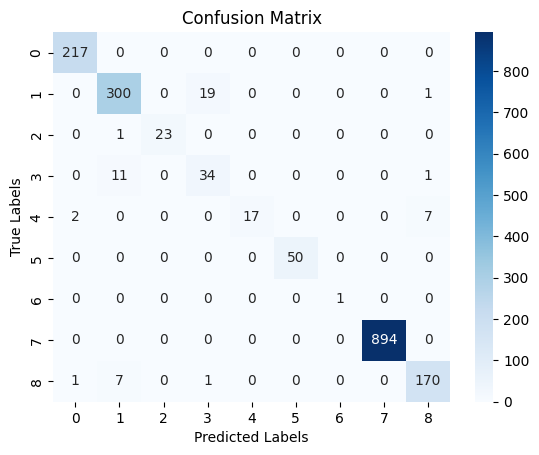

In [46]:
cm_rfc = confusion_matrix(y_test_rfc_orig, y_pred_rfc_orig)

sns.heatmap(cm_rfc, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



*   **Train the Model with Naive Bayes**



In [47]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train_scaled, y_train)

GaussianNB()

In [48]:
y_pred_gnb = gnb.predict(X_test_scaled)
y_pred_gnb_orig = le.inverse_transform(y_pred_gnb)
y_test_gnb_orig = le.inverse_transform(y_test)

In [49]:
accuracy_gnb = accuracy_score(y_test_gnb_orig, y_pred_gnb_orig)
f1_gnb = f1_score(y_pred_gnb_orig, y_test_gnb_orig, average="weighted")
precision_gnb = precision_score(y_pred_gnb_orig, y_test_gnb_orig, average="weighted", zero_division=0)
recall_gnb = recall_score(y_pred_gnb_orig, y_test_gnb_orig, average="weighted", zero_division=0)

print(f"Accuracy score: {accuracy_gnb}")
print(f"F1 score: {f1_gnb}")
print(f"Precision score: {precision_gnb}")
print(f"Recall score: {recall_gnb}")

Accuracy score: 0.8947068867387592
F1 score: 0.8992191325100435
Precision score: 0.9240238236137569
Recall score: 0.8947068867387592


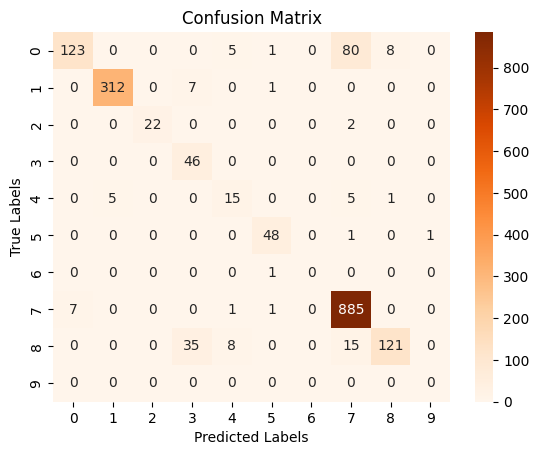

In [50]:
cm_gnb = confusion_matrix(y_test_gnb_orig, y_pred_gnb_orig)

sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



*   **Train the Model with Support Vector Machine**



In [51]:
from sklearn import svm

svc = svm.SVC()

svc.fit(X_train_scaled, y_train)

SVC()

In [52]:
y_pred_svc = svc.predict(X_test_scaled)
y_pred_svc_orig = le.inverse_transform(y_pred_svc)
y_test_svc_orig = le.inverse_transform(y_test)

In [53]:
accuracy_svc = accuracy_score(y_test_svc_orig, y_pred_svc_orig)
f1_svc = f1_score(y_pred_svc_orig, y_test_svc_orig, average="weighted")
precision_svc = precision_score(y_pred_svc_orig, y_test_svc_orig, average="weighted")
recall_svc = recall_score(y_pred_svc_orig, y_test_svc_orig, average="weighted", zero_division=0)

print(f"Accuracy score: {accuracy_svc}")
print(f"F1 score: {f1_svc}")
print(f"Precision score: {precision_svc}")
print(f"Recall score: {recall_svc}")

Accuracy score: 0.8816163915765509
F1 score: 0.8961030009490771
Precision score: 0.9143230541853139
Recall score: 0.8816163915765509


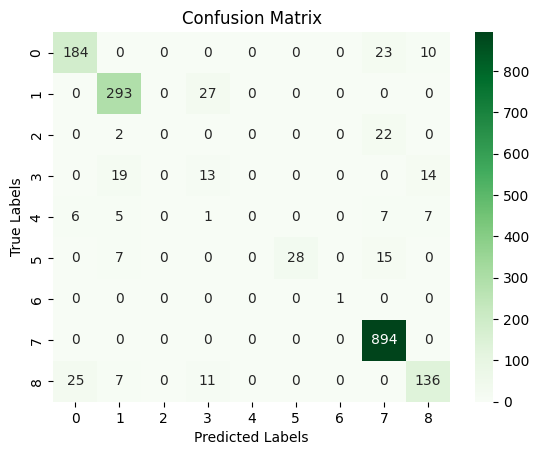

In [54]:
cm_svc = confusion_matrix(y_test_svc_orig, y_pred_svc_orig)

sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



*   **Train the Model with XGBClassifier**



In [55]:
import xgboost as xgb

xgb = xgb.XGBClassifier(
    objective="multi:softmax",
    num_class=len(le.classes_),
    eval_metric="mlogloss",
    learning_rate=0.1,
    max_depth=6,
    n_estimators=100
)

xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_class=13, num_parallel_tree=None, ...)

In [56]:
y_pred_xgb = xgb.predict(X_test_scaled)
y_pred_xgb_orig = le.inverse_transform(y_pred_xgb)
y_test_xgb_orig = le.inverse_transform(y_test)

In [57]:
accuracy_xgb = accuracy_score(y_test_xgb_orig, y_pred_xgb_orig)
f1_xgb = f1_score(y_pred_xgb_orig, y_test_xgb_orig, average="weighted")
precision_xgb = precision_score(y_pred_xgb_orig, y_test_xgb_orig, average="weighted")
recall_xgb = recall_score(y_pred_xgb_orig, y_test_xgb_orig, average="weighted", zero_division=0)

print(f"Accuracy score: {accuracy_xgb}")
print(f"F1 score: {f1_xgb}")
print(f"Precision score: {precision_xgb}")
print(f"Recall score: {recall_xgb}")

Accuracy score: 0.9926010244735345
F1 score: 0.9928224716233582
Precision score: 0.9936038994206325
Recall score: 0.9926010244735345


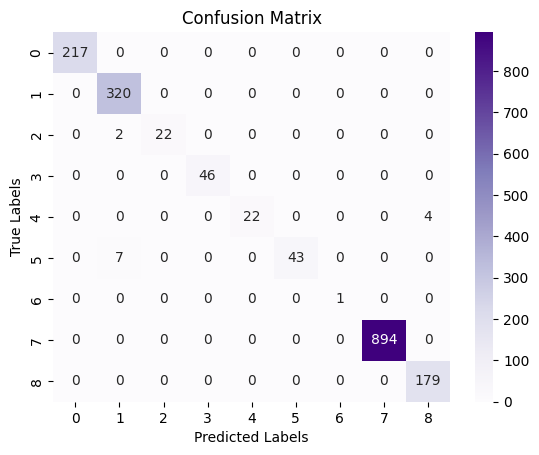

In [58]:
cm_xgb = confusion_matrix(y_test_xgb_orig, y_pred_xgb_orig)

sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



*   **Compare performance between Models**




In [59]:
def compare_performance(metrics, title):
  fig, axes = plt.subplots(2, 2, figsize=(12, 10))
  axes = axes.flatten()

  for i, (metric, (scores, color)) in enumerate(metrics.items()):
    ax = axes[i]
    bars = ax.bar(models, scores, color=color, alpha=0.8)

    for bar in bars:
        ax.text(bar.get_x() + bar.get_width() / 2,
                bar.get_height() / 2,
                f"{bar.get_height():.4f}",
                ha='center', va='center', fontsize=14, color='white', fontweight='bold')

    ax.set_title(f"Comparison of {metric}", fontsize=10)
    ax.set_ylabel("Score")

  plt.suptitle(title, fontsize=14, fontweight='bold')

  plt.tight_layout(rect=[0, 0, 1, 0.96])
  plt.show()

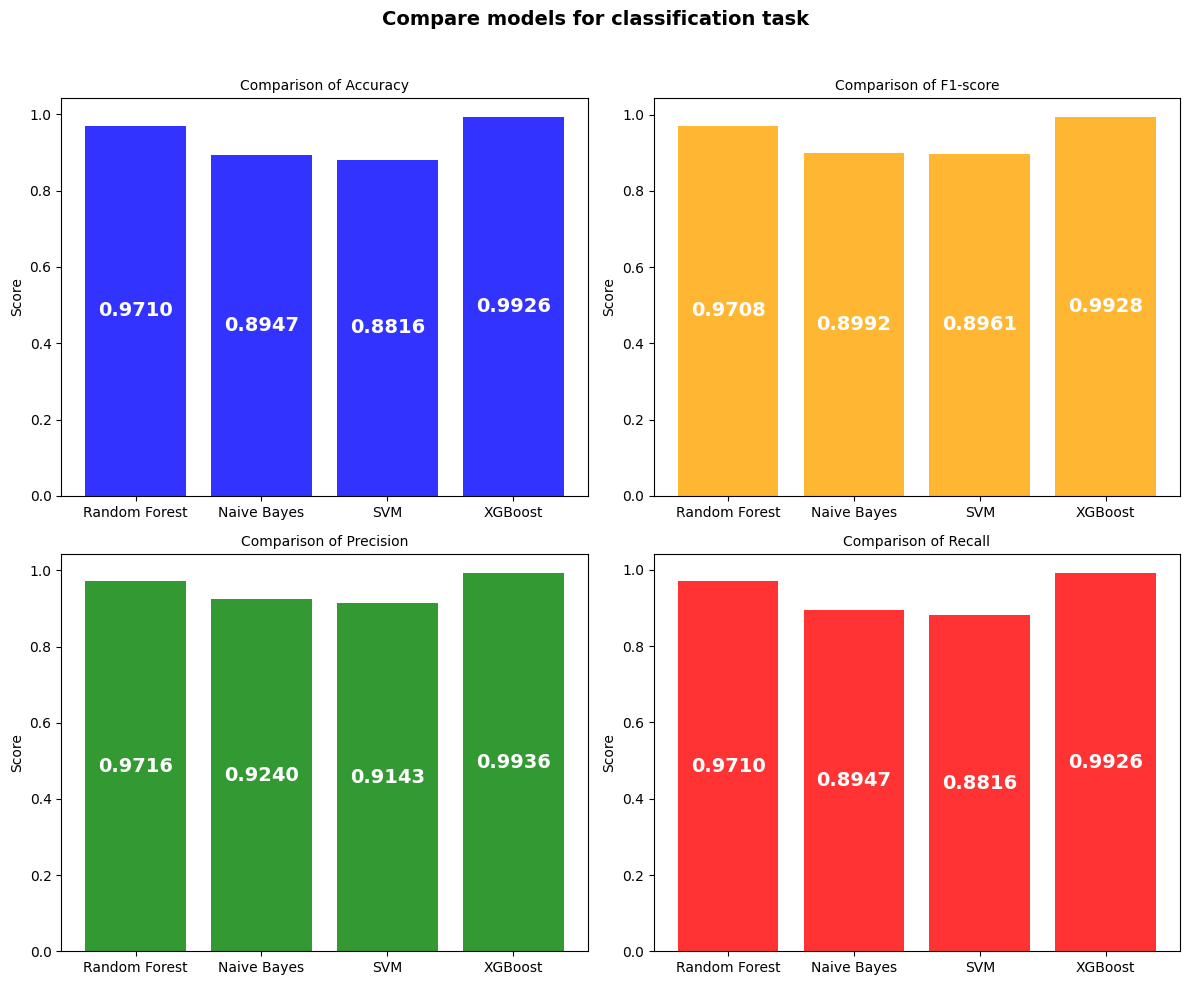

In [60]:
accuracy_scores = [accuracy_rfc, accuracy_gnb, accuracy_svc, accuracy_xgb]
f1_scores = [f1_rfc, f1_gnb, f1_svc, f1_xgb]
precision_scores = [precision_rfc, precision_gnb, precision_svc, precision_xgb]
recall_scores = [recall_rfc, recall_gnb, recall_svc, recall_xgb]

models = ["Random Forest", "Naive Bayes", "SVM", "XGBoost"]

metrics = {
    "Accuracy": (accuracy_scores, "blue"),
    "F1-score": (f1_scores, "orange"),
    "Precision": (precision_scores, "green"),
    "Recall": (recall_scores, "red"),
}

compare_performance(metrics, 'Compare models for classification task')

### **Regression**



*   **Function for preparing Multi-output Regression data**



In [61]:
def prepare_regression_data (df, feature):
  data = df.copy()

  data['target_1'] = data.shift(-1)[feature]
  data['target_2'] = data.shift(-2)[feature]
  data['target_3'] = data.shift(-3)[feature]

  data.dropna(inplace=True)

  y = data[['target_1', 'target_2', 'target_3']]
  X = data.drop(['target_1', 'target_2', 'target_3'], axis=1)

  return X, y



*   **Function for training with various Models**




In [62]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error

def train_regression_model(X, y, model):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

  if model == "Random Forest":
    model = RandomForestRegressor(n_estimators=100, random_state=42)
  elif model == "XGBoost":
    model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, objective='reg:squarederror', random_state=42)
  elif model == "Linear Regression":
    model = LinearRegression()
  elif model == "MLPRegressor":
    model = MLPRegressor(hidden_layer_sizes=(64, 32, 16), activation='relu', solver='adam', max_iter=500, random_state=42)

  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  rmse = root_mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print(f"Mean Squared Error: {mse}")
  print(f"Mean Absolute Error: {mae}")
  print(f"Root Mean Squared Error: {rmse}")
  print(f"R-squared: {r2}")

  return model, mse, mae, rmse, r2, y_pred, y_test



*   **Function to plot diagram compares between predict and actual**



In [63]:
def plot_predict_vs_actual(models_dict, label):

  models = models_dict.keys()
  num_models = len(models)
  target_names = ["target_1", "target_2", "target_3"]
  num_targets = len(target_names)

  fig, axes = plt.subplots(num_models, num_targets, figsize=(num_targets * 5, num_models * 4), sharex=True, sharey=True)

  for row_idx, (model_name, model_info) in enumerate(models_dict.items()):
    for col_idx, target_name in enumerate(target_names):

      ax = axes[row_idx][col_idx]

      y_test_values = model_info["y_test"][target_name].values
      y_pred_values = model_info["y_pred"][:, col_idx]

      ax.plot(y_test_values, label="Actual")

      ax.plot(y_pred_values, label="Predict")

      ax.set_title(f"{model_name} - {label}_{col_idx + 1}h_next", fontsize=12)
      ax.set_xlabel("Time Steps")
      ax.set_ylabel("Temperature")
      ax.legend()

  plt.tight_layout()
  plt.show()



*   **Train the Models to predict Multi-output Temperature**



In [64]:
models = ['Random Forest', 'XGBoost', 'Linear Regression', 'MLPRegressor']

trained_temp_models = {}

X_temp, y_temp = prepare_regression_data(df, 'temp')

print("Multi-output Temperature Prediction")
print("--------------------------------------------\n")

for model in models:
  print(f"Model: {model}")
  trained_model, mse, mae, rmse, r2, y_pred, y_test = train_regression_model(X_temp, y_temp, model)
  trained_temp_models[model] = {"model": trained_model, "r2": r2, "mse": mse, "rmse": rmse, 'mae': mae, 'y_pred': y_pred, 'y_test': y_test}
  print()

Multi-output Temperature Prediction
--------------------------------------------

Model: Random Forest
Mean Squared Error: 1.5292017241795257
Mean Absolute Error: 0.8400277145386706
Root Mean Squared Error: 1.1641258076786616
R-squared: 0.9189417736684176

Model: XGBoost
Mean Squared Error: 1.234763503074646
Mean Absolute Error: 0.7710030674934387
Root Mean Squared Error: 1.0522665977478027
R-squared: 0.9345480799674988

Model: Linear Regression
Mean Squared Error: 1.6385586983645026
Mean Absolute Error: 0.9208990656665245
Root Mean Squared Error: 1.201704801922361
R-squared: 0.9131456775776104

Model: MLPRegressor
Mean Squared Error: 2.0558209294783656
Mean Absolute Error: 1.0698017884162605
Root Mean Squared Error: 1.3898149069693968
R-squared: 0.8910170383892613





*   **Comparision between predict and actual Temperature**



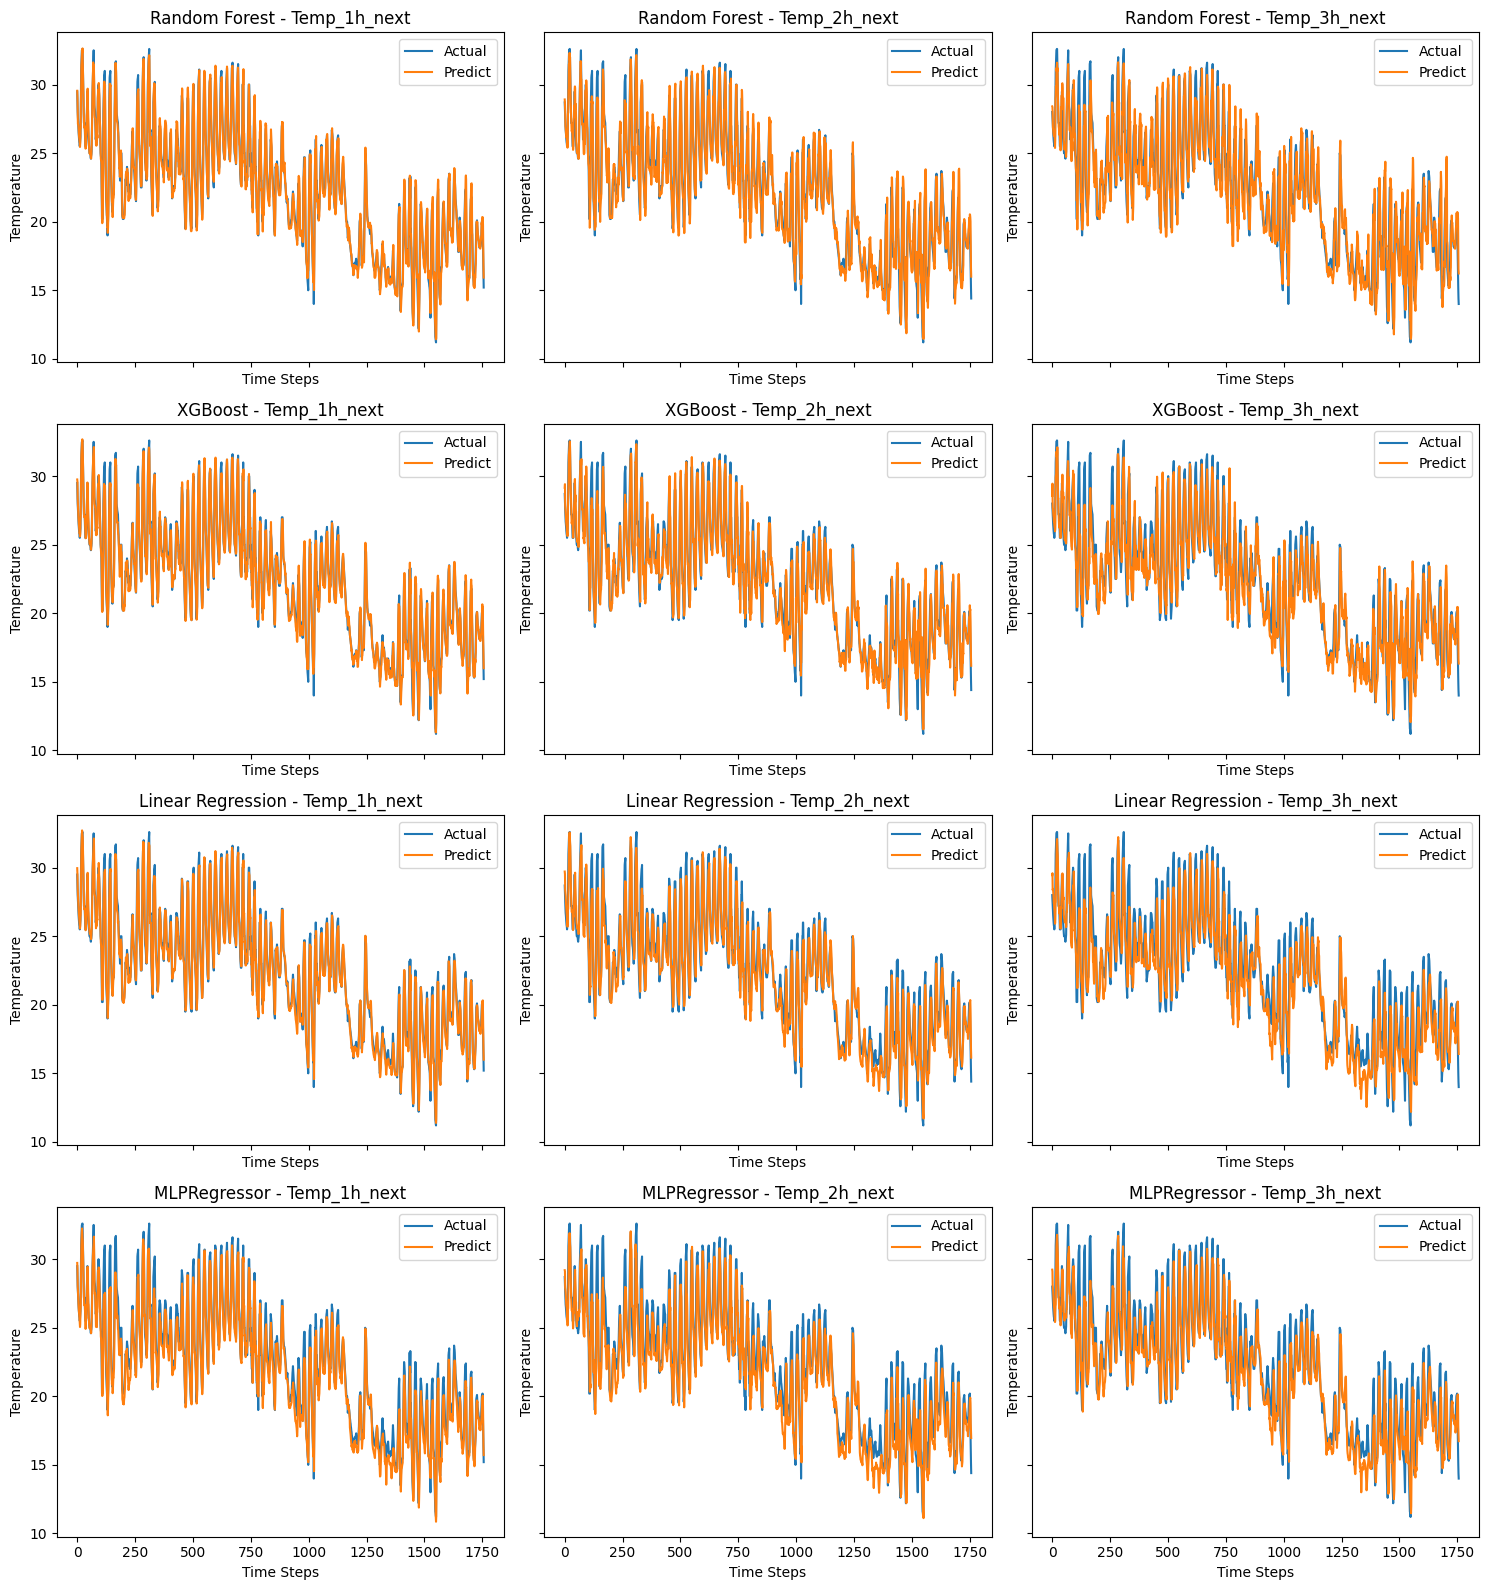

In [65]:
plot_predict_vs_actual(trained_temp_models, "Temp")



*   **Train the Model to predict Multi-output Relative Humid**



In [66]:
X_rh, y_rh = prepare_regression_data(df, 'rh')

print("Multi-output Relative Humidity Prediction")
print("--------------------------------------------\n")

trained_rh_models = {}

for model in models:
  print(f"Model: {model}")
  trained_model, mse, mae, rmse, r2, y_pred, y_test = train_regression_model(X_rh, y_rh, model)
  trained_rh_models[model] = {"model": trained_model, "r2": r2, "mse": mse, "rmse": rmse, 'mae': mae, 'y_pred': y_pred, 'y_test': y_test}
  print()

Multi-output Relative Humidity Prediction
--------------------------------------------

Model: Random Forest
Mean Squared Error: 46.73619532948627
Mean Absolute Error: 4.705566812116611
Root Mean Squared Error: 6.454203628529115
R-squared: 0.8118200043429709

Model: XGBoost
Mean Squared Error: 45.4283561706543
Mean Absolute Error: 4.701412677764893
Root Mean Squared Error: 6.369273662567139
R-squared: 0.8170852065086365

Model: Linear Regression
Mean Squared Error: 56.44882133525016
Mean Absolute Error: 5.405280427159066
Root Mean Squared Error: 7.085802161703099
R-squared: 0.772713535017759

Model: MLPRegressor
Mean Squared Error: 53.342769528556175
Mean Absolute Error: 5.31594202665652
Root Mean Squared Error: 6.9162248363024865
R-squared: 0.7852172421044673





*   **Comparision between predict and actual Relative Humid**



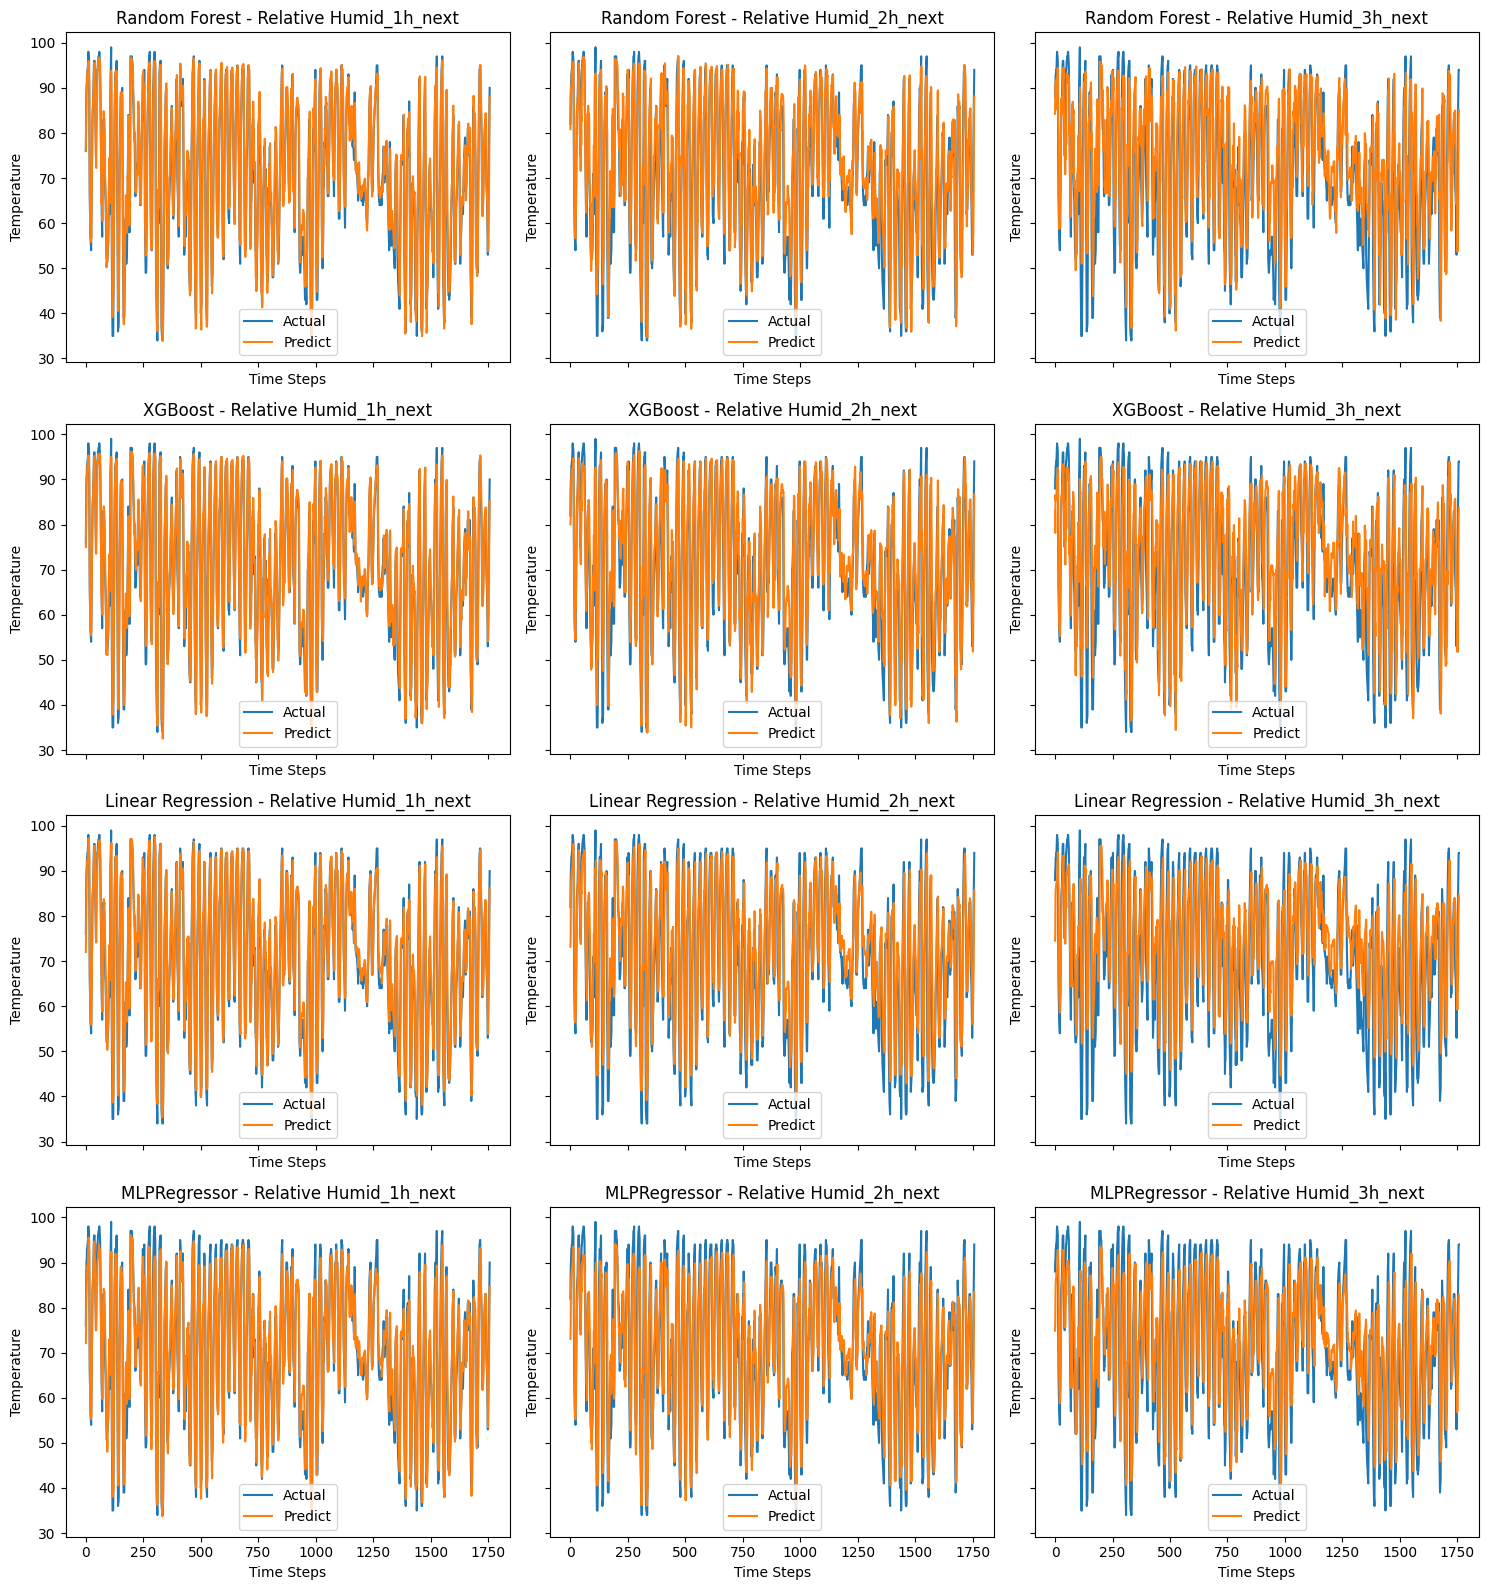

In [67]:
plot_predict_vs_actual(trained_rh_models, "Relative Humid")



*   **Compare performance between Models**



In [81]:
models = ['Random Forest', 'XGBoost', 'Linear Regression', 'MLPRegressor']

r2_scores_temp = [trained_temp_models[model]["r2"] for model in models]
mse_scores_temp = [trained_temp_models[model]["mse"] for model in models]
rmse_scores_temp = [trained_temp_models[model]["rmse"] for model in models]
mae_scores_temp = [trained_temp_models[model]["mae"] for model in models]

r2_scores_rh = [trained_rh_models[model]["r2"] for model in models]
mse_scores_rh = [trained_rh_models[model]["mse"] for model in models]
rmse_scores_rh = [trained_rh_models[model]["rmse"] for model in models]
mae_scores_rh = [trained_rh_models[model]["mae"] for model in models]

metrics_temp_model = {
    "R-squared": (r2_scores_temp, "blue"),
    "Mean Squared Error": (mse_scores_temp, "orange"),
    "Root Mean Squared Error": (rmse_scores_temp, "green"),
    "Mean Absolute Error": (mae_scores_temp, "red"),
}

metrics_rh_model = {
    "R-squared": (r2_scores_rh, "blue"),
    "Mean Squared Error": (mse_scores_rh, "orange"),
    "Root Mean Squared Error": (rmse_scores_rh, "green"),
    "Mean Absolute Error": (mae_scores_rh, "red"),
}

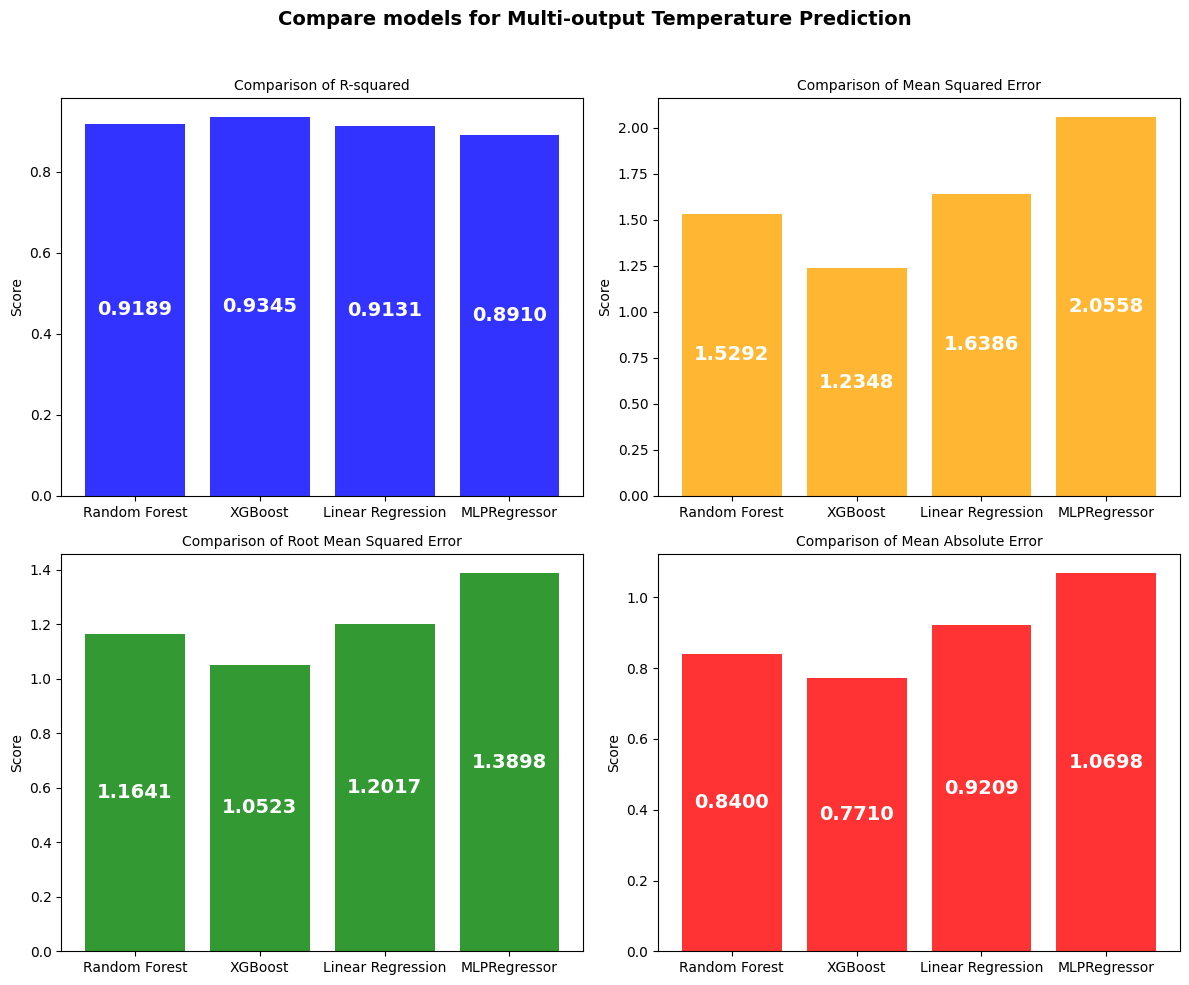

In [82]:
compare_performance(metrics_temp_model, 'Compare models for Multi-output Temperature Prediction')

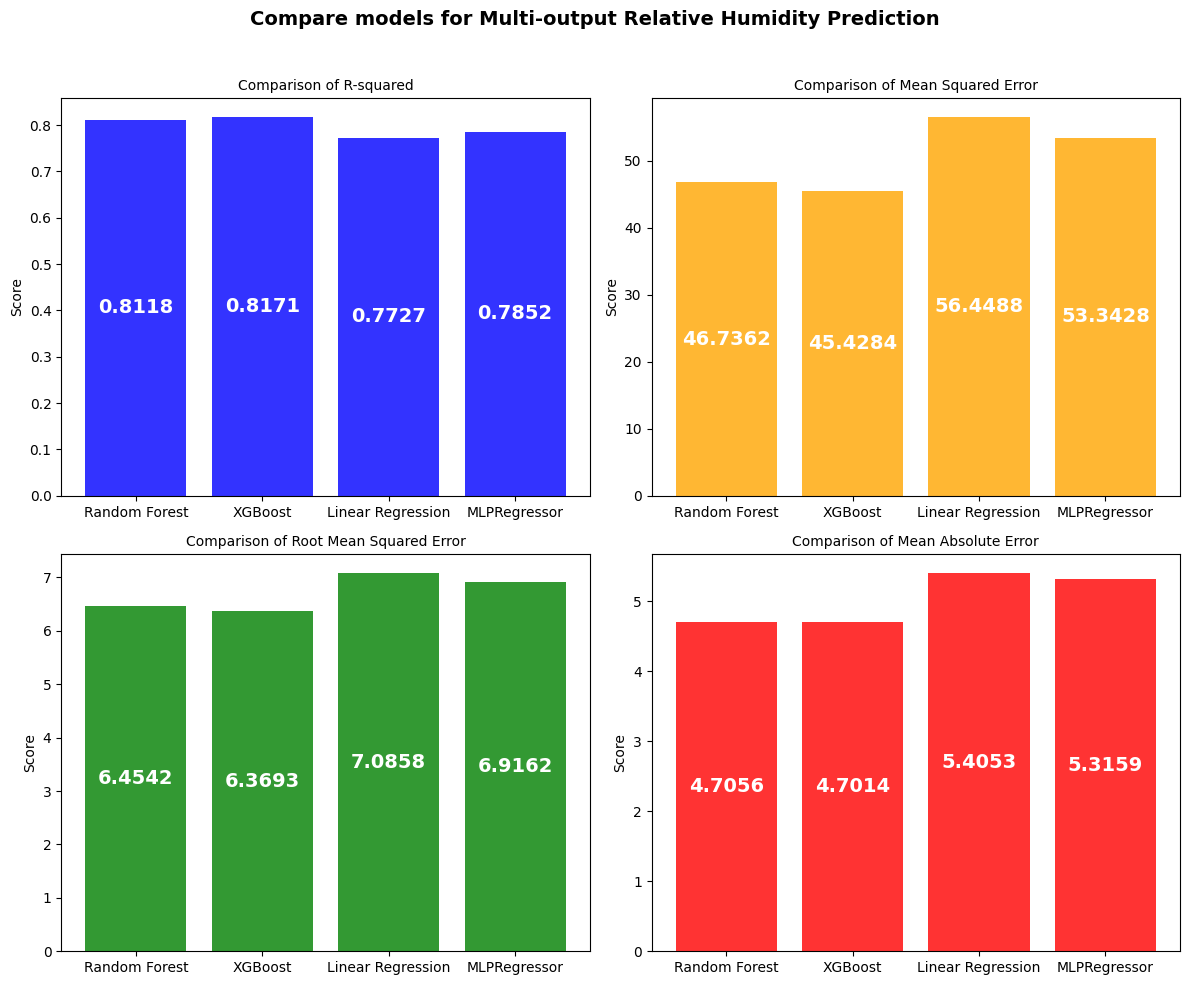

In [83]:
compare_performance(metrics_rh_model, 'Compare models for Multi-output Relative Humidity Prediction')

## **Evaluation**



*   **Function to fetch current weather data of specific city**



In [71]:
def get_current_weather(city):
  baseURL = "https://api.weatherbit.io/v2.0/current?"
  query_string = {"city": city, "key": WEATHERBIT_API_KEY_2}

  response = requests.get(baseURL, query_string).json()

  raw = json_normalize(response["data"])

  features = ['clouds', 'dewpt', 'pod', 'precip',	'pres',	'rh',	'slp', 'temp',	'uv',	'vis', 'wind_dir', 'gust', 'wind_spd', 'weather.description']

  current_data = raw[features]
  current_data = current_data.rename(columns={"weather.description": "summary"})

  if (current_data['summary'] == 'Clear sky').any():
    current_data['summary'] = 1
  else:
    current_data['summary'] = le.transform(current_data['summary'])

  current_data['pod'] = current_data['pod'].map({'d': 0, 'n': 1})

  current_data['gust'] = current_data['gust'].fillna(current_data['wind_spd'])

  current_data = current_data.rename(columns={"gust": "wind_gust_spd"})

  additional_features = ['weather.icon', 'weather.code', "ob_time", "ts", "city_name", "weather.description"]
  additional_data = raw[additional_features]

  return current_data, additional_data



*   **Fetch Current Weather Data to Predict**





In [72]:
current_data, additional_data = get_current_weather("Da Nang")

current_data

<ipython-input-71-ef40843c2c60>:21: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



clouds  dewpt  pod  precip    pres  rh   slp  temp  uv  vis  wind_dir  \
0       0   14.8    1       0  1015.2  60  1016    23   0   16       310   

   wind_gust_spd  wind_spd  summary  
0            3.1       3.1        1

In [73]:
additional_data

weather.icon  weather.code           ob_time          ts city_name  \
0         c01n           800  2025-04-13 14:00  1744552835   Da Nang   

  weather.description  
0           Clear sky

In [74]:
temp_model = trained_temp_models['XGBoost']['model']
rh_model = trained_rh_models['XGBoost']['model']

In [75]:
future_temp = temp_model.predict(current_data)

future_rh = rh_model.predict(current_data)



*   **Temperature and Relative Humid prediction for the next 3 hours**




In [76]:
print("Future Temperature Predictions:")
print(future_temp)

print("\nFuture Relative Humidity Predictions:")
print(future_rh)

Future Temperature Predictions:
[[22.283783 21.811287 21.128164]]

Future Relative Humidity Predictions:
[[61.22869 65.74353 68.47627]]
